<a href="https://colab.research.google.com/github/V-kr0pt/ANN/blob/master/previsao_seno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão Seno

Esse notebook tem por objetivo específico criar uma RNA capaz de simular o comportamento da função seno. No entanto, como objetivo geral, explorar as ferramentas que o tensorflow disponibiliza.  

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Banco de Dados

Criamos primeiramente um banco de dados constituido pelos 100 pontos distribuidos entre 0 e 2$\pi$ e o respectivo seno do ponto. Afim de criar as divisões dos dados em dados de treinamento e de teste permutamos aleatoriamente os dados de forma a que seja possível a RNA compreender o comportamento da função em sua completude e realizamos a divisão da seguinte maneira:
*   70% para treinamento
*   30% para teste  



In [2]:
#Parâmetros
nsamples = 100
test_ratio = 0.3 #30% para teste
val_ratio = 0.2 #20% dos dados de treinamento para validação

In [3]:
#Criando banco de dados Seno
t = np.linspace(0, 2*np.pi, nsamples)

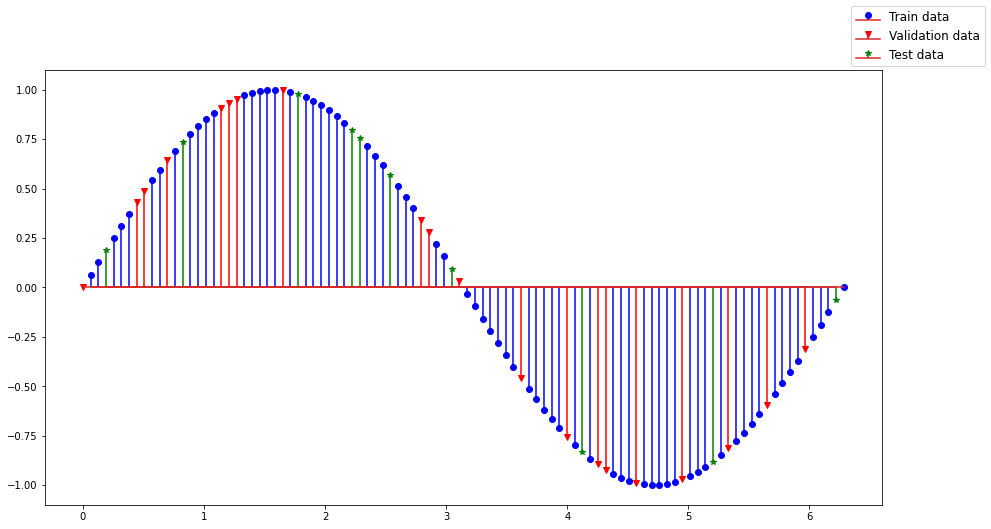

In [4]:
#Dividir em dados de teste e treinamento

#permutando aleatoriamente 
t_permuted = np.random.permutation(t) 
y_permuted = np.sin(t_permuted)

#quantidade de dados para validação e teste
validation_split = int(val_ratio * nsamples) 
test_split = int(test_ratio * nsamples)

#Treinamento 
Xva, Xts, Xtr = np.split(t_permuted, [validation_split,test_split])
yva, yts, ytr = np.split(y_permuted, [validation_split,test_split])

#Apresentando a divisão feita
fig1, ax1 = plt.subplots(figsize=(15,8))
ax1.stem(Xtr, ytr, linefmt='b', markerfmt = 'bo', label= 'Train data', use_line_collection=True)
ax1.stem(Xva, yva, linefmt='r', markerfmt = 'rv', label= 'Validation data', use_line_collection=True)
ax1.stem(Xts, yts, linefmt='g', markerfmt = 'g*', label= 'Test data', use_line_collection=True)
fig1.legend(fontsize=12)
fig1.show()

## RNA

### Modelo 1

O primeiro modelo criando será uma RNA sequencial, densamente conectada, com uma entrada, 3 neurônios na primeira e na segunda camada escondida, e um neurônio na camada de saída. 

In [5]:
#Criando a RNA
model = tf.keras.Sequential(
    [
      tf.keras.layers.Dense(3, activation='tanh', input_shape=(1,), name="hiddenlayer1"),
      tf.keras.layers.Dense(3, activation='tanh', name="hiddenlayer2"),
      tf.keras.layers.Dense(1, name="outputlayer")
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hiddenlayer1 (Dense)         (None, 3)                 6         
_________________________________________________________________
hiddenlayer2 (Dense)         (None, 3)                 12        
_________________________________________________________________
outputlayer (Dense)          (None, 1)                 4         
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


#### Treinamento do Modelo 1

O treinamento da RNA utilizando como otimizador o algoritmo "rmsprop", apesar de explicitado, não há necessidade de fazer isso, pois é um parâmetro padrão do método compile. Junto a isso, como função de custo e métrica foi utilizado o erro médio quadrático (Mean Squared Error ou MSE). 

In [6]:
#configurações de treinamento
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics='mean_squared_error')

#treinando a RNA
History1 = model.fit(Xtr,
                     ytr, 
                     epochs=10**3,
                     verbose=0,
                     validation_data = (Xva, yva))

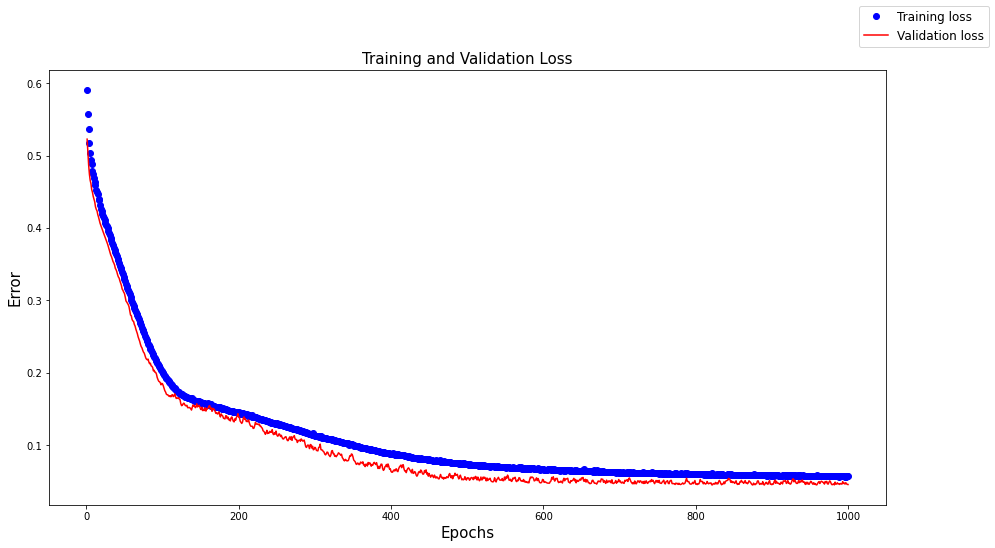

In [7]:
train_loss = History1.history['loss']
validation_loss = History1.history['val_loss']
epochs = range(1, len(train_loss) + 1)

fig_fitmodel1, ax_fitmodel1 = plt.subplots(figsize=(15,8)) 

ax_fitmodel1.plot(epochs, train_loss, 'bo', label='Training loss')
ax_fitmodel1.plot(epochs, validation_loss, 'r', label= 'Validation loss')
ax_fitmodel1.set_title("Training and Validation Loss", size=15)
ax_fitmodel1.set_xlabel("Epochs", size=15)
ax_fitmodel1.set_ylabel("Error", size=15)
fig_fitmodel1.legend(fontsize=12)
fig_fitmodel1.show()

#### Teste do modelo 1

In [8]:
#retorna o erro de teste da função de custo e da métrica escolhida.
test_loss, test_metric = model.evaluate(Xts, yts)
print(f"Test_loss = {test_loss}\nTest_metric = {test_metric}")

1/1 [==============================] - 0s 15ms/step - loss: 0.0759 - mean_squared_error: 0.0759
Test_loss = 0.07593800872564316
Test_metric = 0.07593800872564316


#### Predição do modelo 1


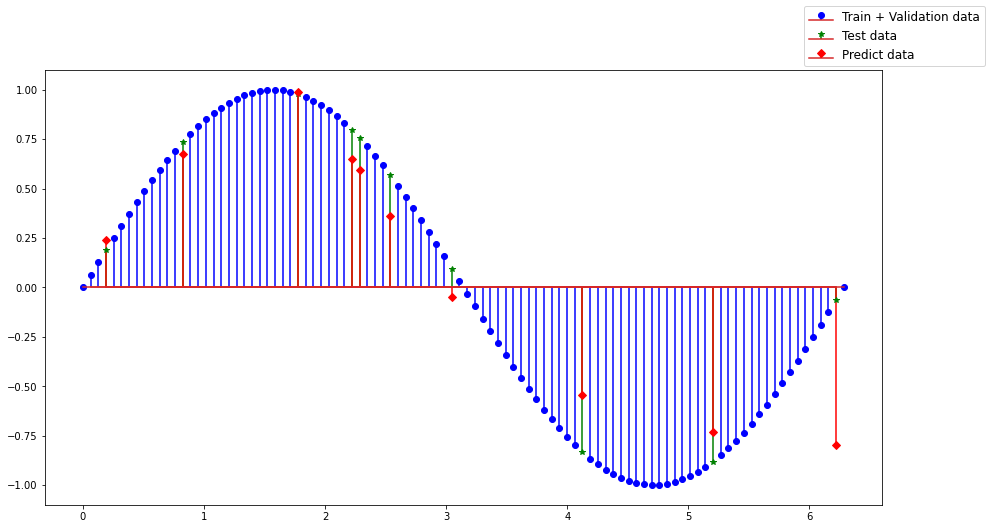

In [9]:
#RNA prevendo a função seno: Entradas Xts e saída a hipótese da RNA 
outputs = model.predict(Xts)


fig2, ax2 = plt.subplots(figsize=(15,8))
ax2.stem(Xtr, ytr, linefmt='b', markerfmt = 'bo', label= 'Train + Validation data', use_line_collection=True)
ax2.stem(Xva, yva, linefmt='b', markerfmt = 'bo', use_line_collection=True)
ax2.stem(Xts, yts, linefmt='g', markerfmt = 'g*', label= 'Test data', use_line_collection=True)
ax2.stem(Xts, outputs, linefmt='r', markerfmt = 'rD', label= 'Predict data', use_line_collection=True)
fig2.legend(fontsize=12)
fig2.show()

### Modelo 2

O segundo modelo criando será uma RNA sequencial, densamente conectada, com uma entrada, 16 neurônios na primeira e na segunda camada escondida, e um neurônio na camada de saída. 

In [10]:
#Criando a RNA
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(16, activation='tanh', input_shape=(1,), name="hiddenlayer1"))
model2.add(tf.keras.layers.Dense(16, activation='tanh', name="hiddenlayer2"))
model2.add(tf.keras.layers.Dense(1, name="outputlayer"))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hiddenlayer1 (Dense)         (None, 16)                32        
_________________________________________________________________
hiddenlayer2 (Dense)         (None, 16)                272       
_________________________________________________________________
outputlayer (Dense)          (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


#### Treinamento do Modelo 2

O treinamento da RNA utilizando como otimizador o algoritmo "rmsprop", função de custo e métrica o erro médio quadrático (Mean Squared Error ou MSE). 

In [11]:
#configurações de treinamento
model2.compile(optimizer='rmsprop', loss='mse', metrics='mean_squared_error')

#treinando a RNA
History2 = model2.fit(Xtr,
                      ytr,
                      epochs=10**3,
                      validation_data = (Xva, yva),
                      verbose=0)

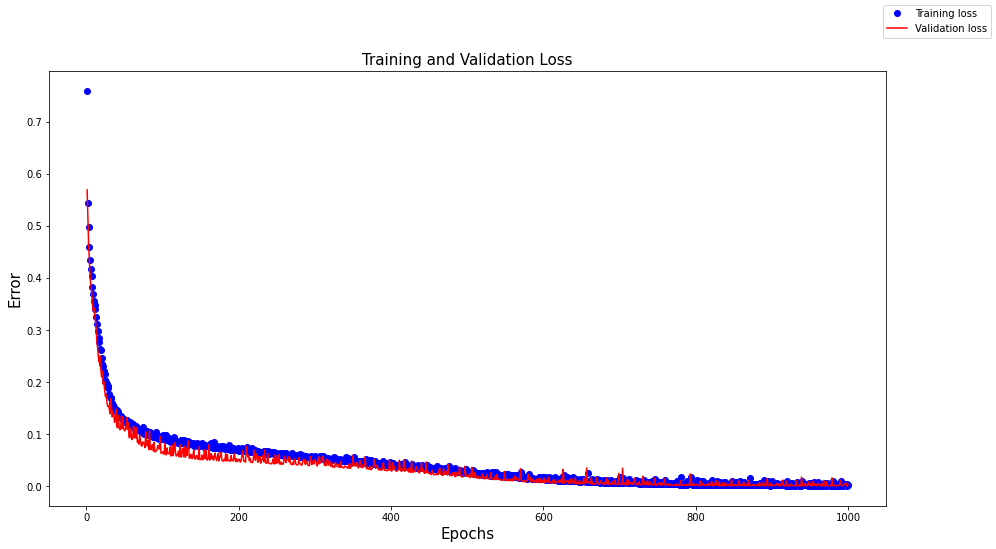

In [12]:
train_loss = History2.history['loss']
validation_loss = History2.history['val_loss']
epochs = range(1, len(train_loss) + 1)

fig_fitmodel2, ax_fitmodel2 = plt.subplots(figsize=(15,8)) 

ax_fitmodel2.plot(epochs, train_loss, 'bo', label='Training loss')
ax_fitmodel2.plot(epochs, validation_loss, 'r', label= 'Validation loss')
ax_fitmodel2.set_title("Training and Validation Loss", size=15)
ax_fitmodel2.set_xlabel("Epochs", size=15)
ax_fitmodel2.set_ylabel("Error", size=15)
fig_fitmodel2.legend(fontsize=10)
fig_fitmodel2.show()

#### Teste do Modelo 2

In [13]:
#retorna o erro de teste da função de custo e da métrica escolhida.
test_loss, test_metric = model2.evaluate(Xts, yts)

print(f"Test_loss = {test_loss}\nTest_metric = {test_metric}")

1/1 [==============================] - 0s 14ms/step - loss: 0.0061 - mean_squared_error: 0.0061
Test_loss = 0.006075733806937933
Test_metric = 0.006075733806937933


Predição do modelo 2

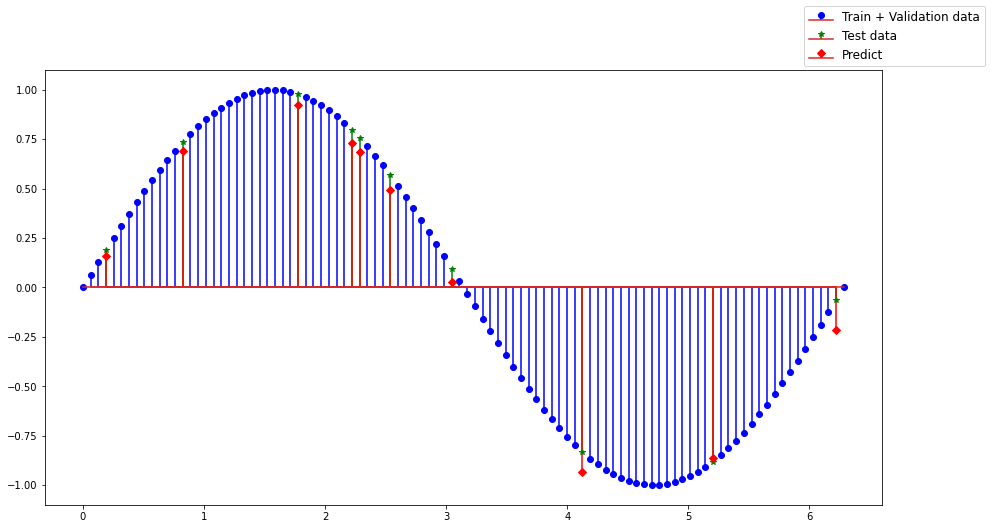

In [14]:
#RNA prevendo a função seno: Entradas Xts e saída a hipótese da RNA 
outputs = model2.predict(Xts)


fig2, ax2 = plt.subplots(figsize=(15,8))
ax2.stem(Xtr, ytr, linefmt='b', markerfmt = 'bo', label= 'Train + Validation data', use_line_collection=True)
ax2.stem(Xva, yva, linefmt='b', markerfmt = 'bo', use_line_collection=True)
ax2.stem(Xts, yts, linefmt='g', markerfmt = 'g*', label= 'Test data', use_line_collection=True)
ax2.stem(Xts, outputs, linefmt='r', markerfmt = 'rD', label= 'Predict', use_line_collection=True)
fig2.legend(fontsize=12)
fig2.show()

### Modelo final da RNA

Como o modelo 2 apresenta melhoria significativa, iremos trabalhar com esse modelo como sendo o "rnamodel" então mais uma vez, criando o modelo:

In [15]:
rnamodel = tf.keras.Sequential()
rnamodel.add(tf.keras.layers.Dense(16, activation='tanh', input_shape = (1,), name='hiddenlayer1')) 
rnamodel.add(tf.keras.layers.Dense(16, activation='tanh', name='hiddenlayer2'))
rnamodel.add(tf.keras.layers.Dense(1, name="outputlayer"))
rnamodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hiddenlayer1 (Dense)         (None, 16)                32        
_________________________________________________________________
hiddenlayer2 (Dense)         (None, 16)                272       
_________________________________________________________________
outputlayer (Dense)          (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


### Treinamento em Batch

Podemos determinar o tamanho do Batch e assim verificarmos o desempenho do treinamento da rede. Por padrão o tamanho do Batch é 32, iremos colocar nesse momento igual a 10

In [16]:
rnamodel.compile(loss='mse', metrics='mean_squared_error')

History = rnamodel.fit(Xtr,
                       ytr,
                       epochs=10**3,
                       batch_size = 10,
                       validation_data = (Xva, yva),
                       verbose=0)                  

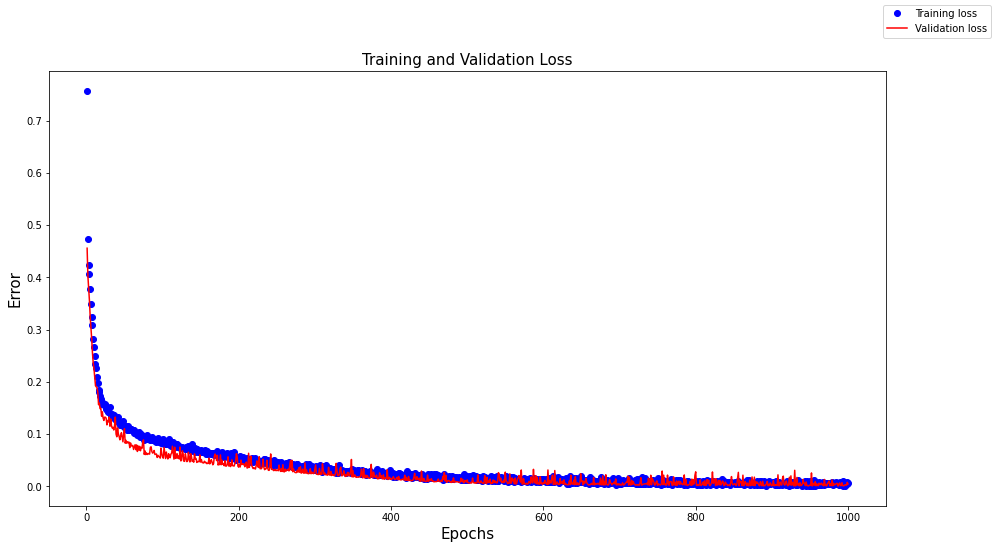

In [17]:
train_loss = History.history['loss']
validation_loss = History.history['val_loss']
epochs = range(1, len(train_loss) + 1)

fig_fit, ax_fit = plt.subplots(figsize=(15,8)) 

ax_fit.plot(epochs, train_loss, 'bo', label='Training loss')
ax_fit.plot(epochs, validation_loss, 'r', label= 'Validation loss')
ax_fit.set_title("Training and Validation Loss", size=15)
ax_fit.set_xlabel("Epochs", size=15)
ax_fit.set_ylabel("Error", size=15)
fig_fit.legend(fontsize=10)
fig_fit.show()

In [18]:
test_loss, test_metric = rnamodel.evaluate(Xts, yts)
print(f"test_loss={test_loss}\ntest_metric={test_metric}")

1/1 [==============================] - 0s 91ms/step - loss: 0.0058 - mean_squared_error: 0.0058
test_loss=0.005795713514089584
test_metric=0.005795713514089584


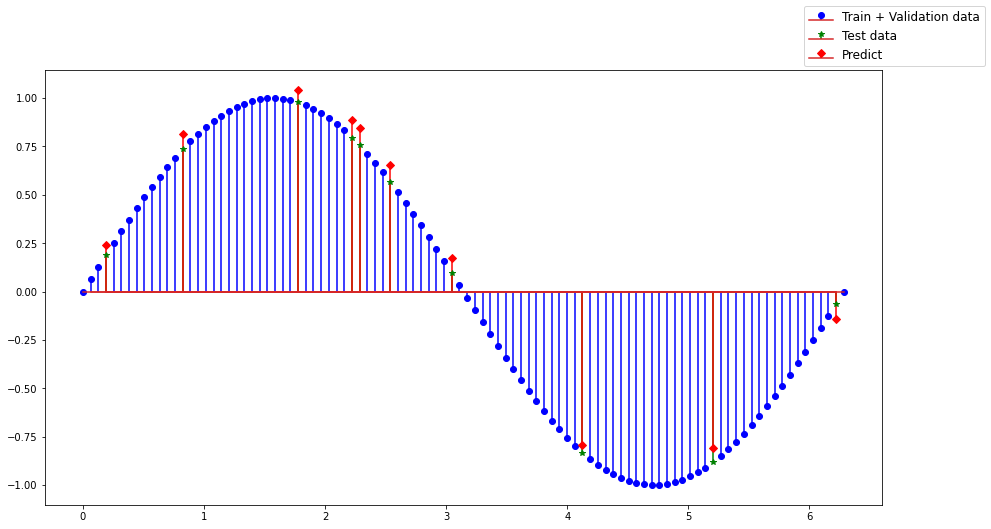

In [19]:
#RNA prevendo a função seno: Entradas Xts e saída a hipótese da RNA 
outputs = rnamodel.predict(Xts)


figrnamodel1, axrnamodel1 = plt.subplots(figsize=(15,8))
axrnamodel1.stem(Xtr, ytr, linefmt='b', markerfmt = 'bo', label= 'Train + Validation data', use_line_collection=True)
axrnamodel1.stem(Xva, yva, linefmt='b', markerfmt = 'bo', use_line_collection=True)
axrnamodel1.stem(Xts, yts, linefmt='g', markerfmt = 'g*', label= 'Test data', use_line_collection=True)
axrnamodel1.stem(Xts, outputs, linefmt='r', markerfmt = 'rD', label= 'Predict', use_line_collection=True)
figrnamodel1.legend(fontsize=12)
figrnamodel1.show()